### Data Exploration 

#### Boat Marketing Data


In [28]:
#import librariers
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#create path
path = r'C:\Users\beatr\Documents\27_06_2023-Boat_Marketing'

In [3]:
#import data set
df_boats = pd.read_csv(os.path.join(path, '02-Data', 'Original', 'boat_data.csv'), index_col = False)

In [4]:
# 1. glimpse if dataset succesfully imported
df_boats.head(5)
# 2. we can identify that we'll have to split price and currency
# 3. also split location 
# 4. NaN values in Material category


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [5]:
# 1. identify what data types we have
df_boats.dtypes

Price                           object
Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Location                        object
Number of views last 7 days      int64
dtype: object

In [6]:
df_boats.describe()
#change year to time
#change price to float64 after splitting from currency

,Year Built,Length,Width,Number of views last 7 days
count,9888.000000,9879.000000,9832.000000,9888.000000
mean,1893.192860,11.570017,3.520124,149.160801
std,460.201582,6.002820,1.220534,151.819752
min,0.000000,1.040000,0.010000,13.000000
25%,1996.000000,7.470000,2.540000,70.000000
50%,2007.000000,10.280000,3.330000,108.000000
75%,2017.000000,13.930000,4.250000,172.000000
max,2021.000000,100.000000,25.160000,3263.000000


### 1. Do data consistency checks
####  mixed data
####  missing values
#### duplicates

In [7]:
#1. Check Data inconsistencies - mixed data types
for col in df_boats.columns.tolist():
  weird = (df_boats[[col]].applymap(type) != df_boats[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_boats[weird]) > 0:
    print (col)

Manufacturer
Type
Material
Location


In [8]:
#changed mixed data types 
df_boats['Manufacturer'] = df_boats['Manufacturer'].astype('str')
df_boats['Type'] = df_boats['Type'].astype('str')
df_boats['Material'] = df_boats['Material'].astype('str')
df_boats['Location'] = df_boats['Location'].astype('str')

In [9]:
#2. identify missing values
df_boats.isnull().sum()
#missing values in length and width

Price                           0
Boat Type                       0
Manufacturer                    0
Type                            0
Year Built                      0
Length                          9
Width                          56
Material                        0
Location                        0
Number of views last 7 days     0
dtype: int64

In [10]:
#replace the missing values with a median as the data is skewed to the right
df_boats['Width'].fillna(df_boats['Width'].median(),inplace=True)
df_boats['Length'].fillna(df_boats['Length'].median(),inplace=True)
df_boats.isnull().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

In [11]:
# 3. duplicates
df_dups = df_boats[df_boats.duplicated()]
df_dups
#No duplicates

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days


In [13]:
#Split Price to 'currency','Price'
df_boats[['currency','Price']]= df_boats['Price'].str.split(' ', 1, expand = True)
df_boats.head()

C:\Users\beatr\AppData\Local\Temp\ipykernel_1468\707976848.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_boats[['currency','Price']]= df_boats['Price'].str.split(' ', 1, expand=True)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,nan,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,nan,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [14]:
#check the results of the stringsplit
df_boats['currency'].value_counts()

EUR    8430
CHF     980
Â£      298
DKK     180
Name: currency, dtype: int64

In [16]:
#create the third column where euro price
# 1. Create a new function europrice
# 2. Apply this function
def eurprice(Price,currency):
    if currency == 'EUR':
        return Price
    elif currency == 'CHF':
        return int(Price) * 1.02
    elif currency == 'DKK':
        return int(Price) * 0.13
    elif currency == 'Â£':
        return int(Price) * 1.17 
    
df_boats['EUR_price'] = df_boats.apply(lambda x: eurprice(x.Price, x.currency), axis=1)

In [17]:
df_boats.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,EUR_price
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,nan,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3403.74
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3845.4
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,nan,Denmark Â» Svendborg,64,DKK,3367.0
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399


In [18]:
#Split Location to 'Country ,'City','Other'

df_boats[['Country','City']] = df_boats['Location'].str.split('Â»', 1, expand = True)

df_boats[['City','Other']] = df_boats['City'].str.split('Â»', 1, expand = True)

df_boats['City'] = df_boats['City'].str.replace('¶','', regex = True)

df_boats['City'] = df_boats['City'].str.replace('Ã','', regex = True)

df_boats.head()

C:\Users\beatr\AppData\Local\Temp\ipykernel_1468\3957924340.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_boats[['Country','City']]= df_boats['Location'].str.split('Â»', 1, expand = True)
C:\Users\beatr\AppData\Local\Temp\ipykernel_1468\3957924340.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_boats[['City','Other']]= df_boats['City'].str.split('Â»', 1, expand = True)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,EUR_price,Country,City,Other
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,nan,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3403.74,Switzerland,Lake Geneva,VÃ©senaz
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,Germany,Bnningstedt,None
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3845.4,Switzerland,Lake of Zurich,StÃ¤fa ZH
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,nan,Denmark Â» Svendborg,64,DKK,3367.0,Denmark,Svendborg,None
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,Germany,Bayern,MÃ¼nchen


In [19]:
df_boats = df_boats.drop(['Location','currency','Price','Other'], axis = 1)
df_boats.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,nan,226,3403.74,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490,Germany,Bnningstedt
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,3845.4,Switzerland,Lake of Zurich
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,nan,64,3367.0,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399,Germany,Bayern


In [22]:
#check for missing values
df_boats.isna().sum()

Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR_price                      0
Country                        0
City                           0
dtype: int64

In [21]:
#fill in missing cities with 'None'
df_boats['City'].fillna('None', inplace = True)

In [25]:
df_boats.dtypes
#change euro price to float

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR_price                       object
Country                         object
City                            object
dtype: object

In [26]:
df_boats['EUR_price'] = df_boats['EUR_price'].astype(float)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Display Model,Gas'),
  Text(1, 0, 'Used boat,Hybrid'),
  Text(2, 0, 'new boat from stock,Diesel'),
  Text(3, 0, 'new boat from stock,Unleaded'),
  Text(4, 0, 'Diesel'),
  Text(5, 0, 'nan'),
  Text(6, 0, 'Used boat'),
  Text(7, 0, 'new boat from stock,Gas'),
  Text(8, 0, 'new boat on order,Unleaded'),
  Text(9, 0, 'Used boat,Diesel'),
  Text(10, 0, 'new boat from stock'),
  Text(11, 0, 'Display Model,Electric'),
  Text(12, 0, 'new boat from stock,Electric'),
  Text(13, 0, 'Electric'),
  Text(14, 0, 'new boat on order'),
  Text(15, 0, 'Unleaded'),
  Text(16, 0, 'Used boat,Electric'),
  Text(17, 0, 'new boat on order,Diesel'),
  Text(18, 0, 'Display Model,Unleaded'),
  Text(19, 0, 'Used boat,Gas'),
  Text(20, 0, 'Display Model'),
  Text(21, 0, 'Used boat,Propane'),
  Text(22, 0, 'Display Model,Diesel'),
  Text(23, 0, 'Used boat,Unleaded'),
  Text(24, 0, 'new 

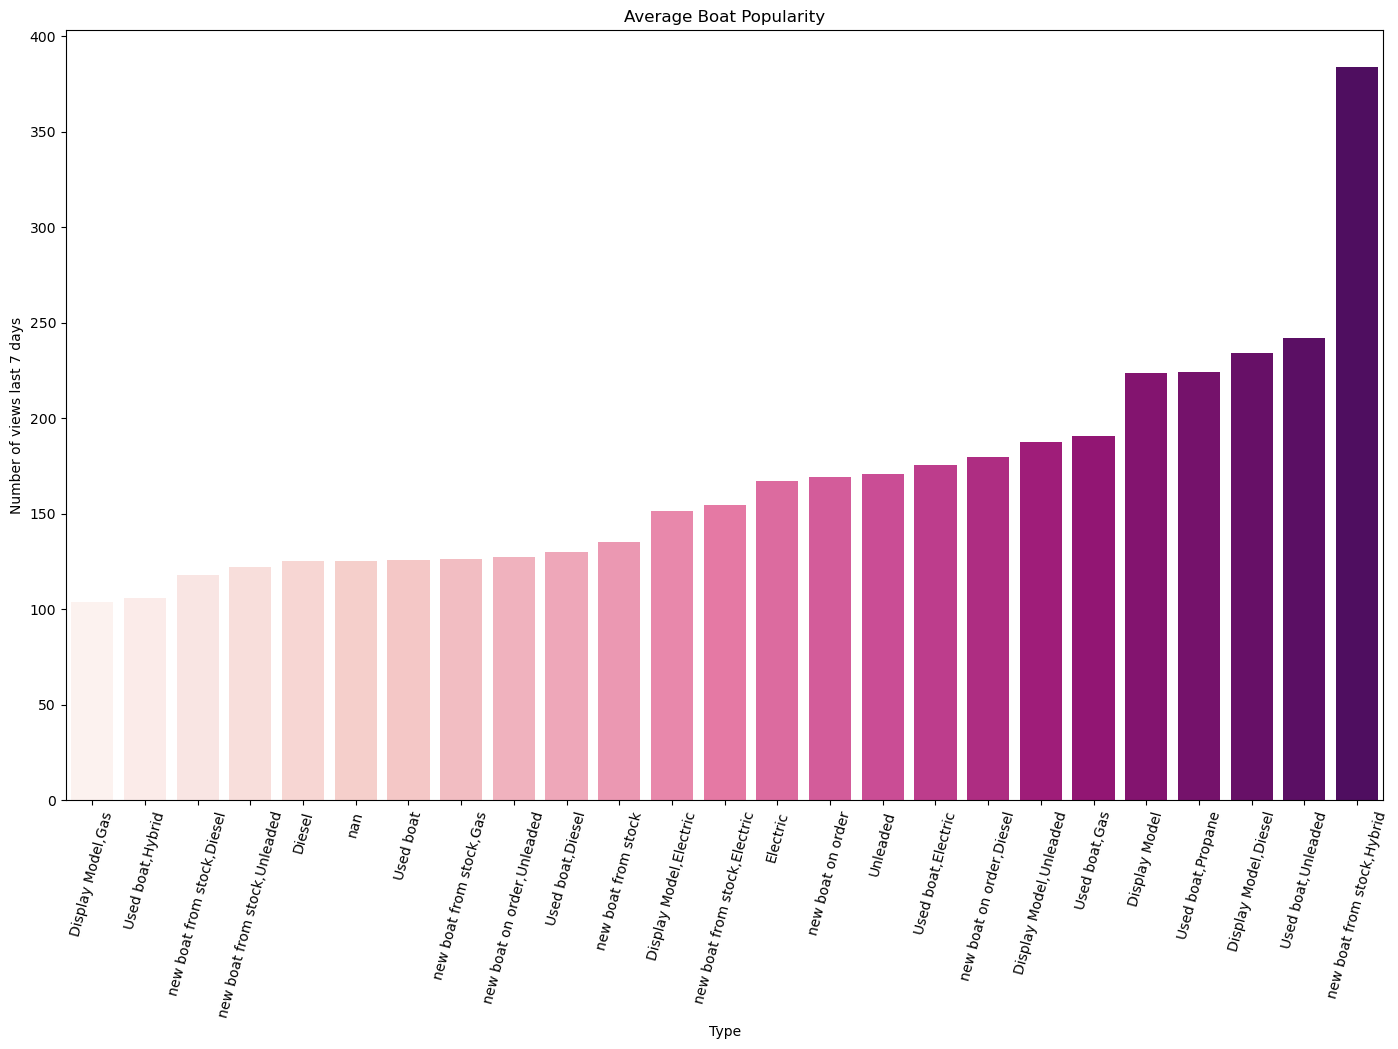

In [43]:
# Most popular boat by type
fig = plt.figure(figsize=(17,10) )
type_of_boat = df_boats.groupby('Type')['Number of views last 7 days'].mean().sort_values().reset_index(drop = False)

sns.barplot(x ='Type', y = 'Number of views last 7 days', data = type_of_boat,
                 palette = 'RdPu')
plt.title("Average Boat Popularity")
plt.xticks(rotation = 75)
